# Multiple Linear Regression
It is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Implementation of Multiple Linear Regression model using Python:

Problem Description:

We have a dataset of 50 start-up companies. This dataset contains five main information: R&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year. Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.

Since we need to find the Profit, so it is the dependent variable, and the other four variables are independent variables. Below are the main steps of deploying the MLR model:

Data Pre-processing Steps Fitting the MLR model to the training set Predicting the result of the test set

Importing the Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing the dataset
start_up=pd.read_csv("50_Startups.csv")
start_up

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#get information about dataset
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#checking whether our dataset has null value or not
start_up.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

X-Independent Variable Y-Dependent Variable

In [5]:
#Segregateb Dataset into X(Input/Independent Variable) & Y(Output/Dependent Variable)
X=start_up.iloc[:,:-1]
Y=start_up.iloc[:,-1]

In [6]:
X=start_up.iloc[:,:-1].values
Y=start_up.iloc[:,-1].values

In [7]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

Step 3: Encoding Categorical Data As long as there are numbers in the dataset, we can easily apply mathematical computations on the dataset and create prediction models. In this dataset, we come across a non-number variable that is “State”. This is also called as categorical data.

We encode this categorical data using another important library called as sklearn. In this, we import the ColumnTransformer and OneHotEncoder. The ColumnTransformer allows a particular column of the DataFrame to be the transformed separately. In our case, we use the OneHotEncoder to transform our “State” column (index=3) to numerical data.

After encoding the categorical data, We print our DataFrame X and see the changes. We see that there has been an inclusion of three new columns at the beginning. Each column represents one of the “States”. For example, in the first row, the third column represents “New York” and hence the value “1” in the third column.

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')#[3]-state is third column tha't why
                                                                           #remainder="passthrough"-that columns not specified in transformers should be passed through without any transformation.
x=np.array(ct.fit_transform(X))
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

Step 4: Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=1)

Step 5: Training the Multiple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
stud=LinearRegression()
stud.fit(x_train,y_train)

LinearRegression()

Predicting For all Test Data

In [11]:
y_predict=stud.predict(x_test)

In [12]:
y_predict

array([116262.60539507,  91489.96032487,  76360.93261681,  71194.68706179,
       179490.90199426, 172318.39854939,  50008.92061015, 103038.26880741,
        59896.18621159,  99000.90388475,  98497.76096097,  83942.40751459,
       119227.02626062])

In [13]:
y_test

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39, 182901.99,
        35673.41, 101004.64,  49490.75,  97483.56,  97427.84,  81005.76,
       111313.02])

In [14]:
x_prd=stud.predict(x_test)
#x_prd
x_prd.round()

array([116263.,  91490.,  76361.,  71195., 179491., 172318.,  50009.,
       103038.,  59896.,  99001.,  98498.,  83942., 119227.])

In [15]:
 stud.score(x_test,y_test)

0.9614855512863149

Text(0, 0.5, 'Predicted')

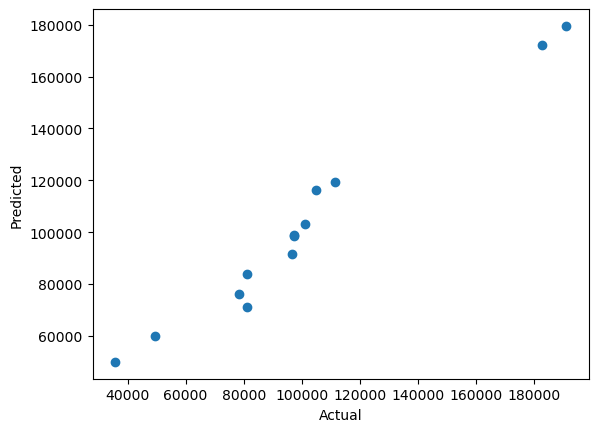

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [17]:
#performance Analysis
from sklearn.metrics import mean_squared_error,r2_score
rscore=r2_score(y_test,y_predict)
r=rscore*100
print(r.round(),'%')

96.0 %


In [18]:
start_up

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


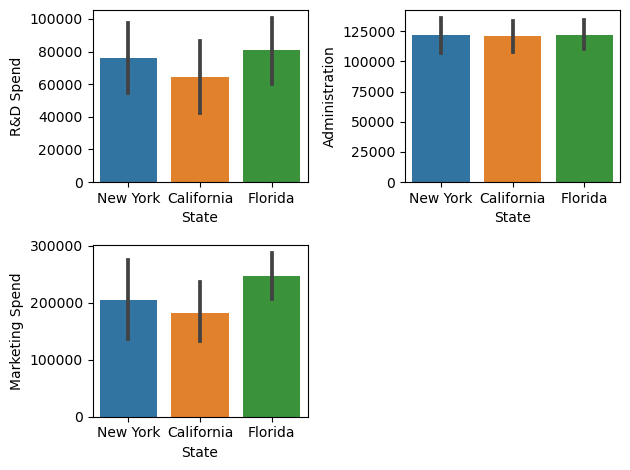

In [19]:
import seaborn as sns
r=2
c=2
it=1
for x in ['R&D Spend','Administration','Marketing Spend']:
    plt.subplot(r,c,it)
    sns.barplot(x='State',y=x,data=start_up)
    it+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='State', ylabel='Profit'>

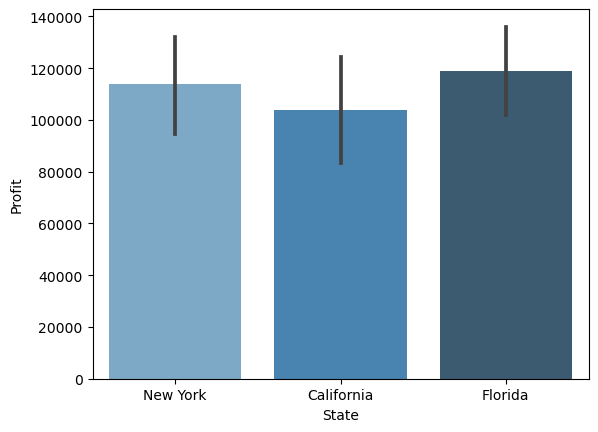

In [20]:
sns.barplot(x='State',y='Profit',data=start_up,palette="Blues_d")

<Axes: ylabel='Administration'>

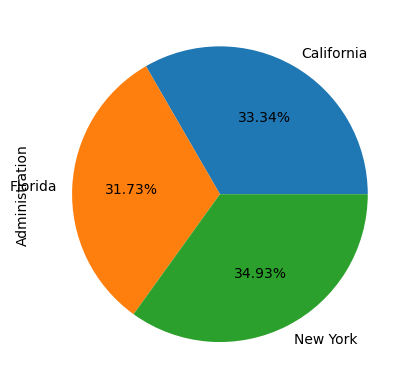

In [21]:
#Statewise Administration
start_up.groupby('State')['Administration'].median().plot(kind='pie',autopct='%0.2f%%')